In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_html("https://github.com/krishnaik06/Feature-Engineering-Live-sessions/blob/master/titanic.csv")
df = df[0]
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,NaN,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,NaN,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,NaN,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,NaN,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

Unnamed: 0     891
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df = df.loc[:,["Age","Cabin","Fare","Survived"]]
df.head()

,Age,Cabin,Fare,Survived
0,22.0,NaN,7.2500,0
1,38.0,C85,71.2833,1
2,26.0,NaN,7.9250,1
3,35.0,C123,53.1000,1
4,35.0,NaN,8.0500,0


In [8]:
df.isnull().sum()

Age         177
Cabin       687
Fare          0
Survived      0
dtype: int64

## 1. Mean,Median,Mode imputation

Check the distribution of the data. If Outliers are there then go for median else mean. In Categoriacal Variable u can prefer mode

In [9]:
df.Age.median()

28.0

In [12]:
def impute_median(df,variable,median):
    
    df[variable + '_median'] =   df[variable].fillna(median)

In [13]:
impute_median(df,"Age",28.0)
df.Age.isnull().sum()

177

In [14]:
df.head()

,Age,Cabin,Fare,Survived,Age_median
0,22.0,NaN,7.2500,0,22.0
1,38.0,C85,71.2833,1,38.0
2,26.0,NaN,7.9250,1,26.0
3,35.0,C123,53.1000,1,35.0
4,35.0,NaN,8.0500,0,35.0


In [15]:
df["Age_median"].isnull().sum()

0

## 2. Random Sample Imputation

In [23]:
import random
def impute_random(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [16]:
df['Age'].sample(5)

231    29.0
336    29.0
239    33.0
146    27.0
575    19.0
Name: Age, dtype: float64

In [24]:
impute_random(df,'Age')
df.head()

,Age,Cabin,Fare,Survived,Age_median,Age_random
0,22.0,NaN,7.2500,0,22.0,22.0
1,38.0,C85,71.2833,1,38.0,38.0
2,26.0,NaN,7.9250,1,26.0,26.0
3,35.0,C123,53.1000,1,35.0,35.0
4,35.0,NaN,8.0500,0,35.0,35.0


In [25]:
df.isnull().sum()

Age           177
Cabin         687
Fare            0
Survived        0
Age_median      0
Age_random      0
dtype: int64

In [33]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [34]:
len(df.Cabin.unique())

148

## 3. Capture Nan Values with a new feature

works well when data is not MCAR

#### Advantages
1. Easy to Implement
2. Captures the importance of missing values

##### Disadvantages
1. Creates addition features, thus if many features are there then Curse of Dimensionality

In [37]:
df["Age_NAN"] = np.where(df["Age"].isnull(),1,0)

In [38]:
df.head()

,Age,Cabin,Fare,Survived,Age_median,Age_random,Age_NAN
0,22.0,NaN,7.2500,0,22.0,22.0,0
1,38.0,C85,71.2833,1,38.0,38.0,0
2,26.0,NaN,7.9250,1,26.0,26.0,0
3,35.0,C123,53.1000,1,35.0,35.0,0
4,35.0,NaN,8.0500,0,35.0,35.0,0


## 4. End of Distribution Imputation

##### Advantages
1. Easy to imp
2. Captures importance of the missing vakues

##### DisAdv
1. Distorts the original distribution of the variable
2. If missingness is not important then issue
3. if the no of NA is big, it will mask the true outliers
4. If no of Na is small, then the replaced NA may be considered as an outlier and pre-processed for futher Feat Engineering

<AxesSubplot:>

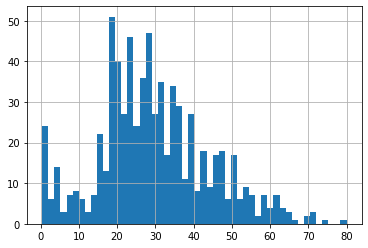

In [42]:
df.Age.hist(bins = 50)

In [48]:
# val after 3rd std dev, far end 
extreme = df.Age.mean() + 3*df.Age.std()
# use this val to replace nan

C:\Users\KESHAV SINGHANIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

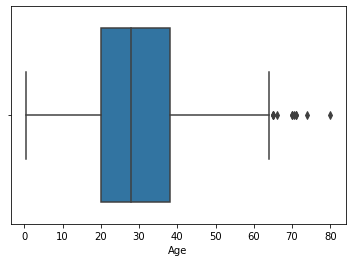

In [44]:
sns.boxplot("Age", data = df)

In [47]:
def impute_eod(df,variable,extreme):
    df[variable + "_eod"] = df[variable].fillna(extreme)

In [49]:
impute_eod(df,"Age",extreme)
df.head()

,Age,Cabin,Fare,Survived,Age_median,Age_random,Age_NAN,Age_eod
0,22.0,NaN,7.2500,0,22.0,22.0,0,22.0
1,38.0,C85,71.2833,1,38.0,38.0,0,38.0
2,26.0,NaN,7.9250,1,26.0,26.0,0,26.0
3,35.0,C123,53.1000,1,35.0,35.0,0,35.0
4,35.0,NaN,8.0500,0,35.0,35.0,0,35.0


In [50]:
df["Age_eod"].median()

32.0

C:\Users\KESHAV SINGHANIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_eod'>

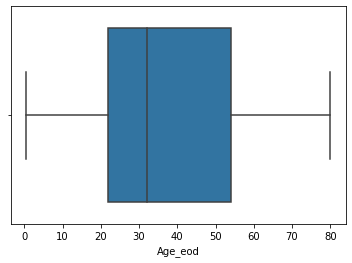

In [51]:
sns.boxplot("Age_eod",data = df)

<AxesSubplot:>

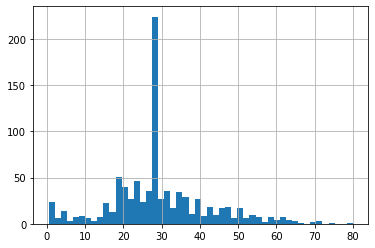

In [52]:
df['Age_median'].hist(bins =50)

<AxesSubplot:>

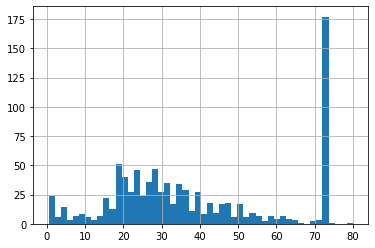

In [53]:
df['Age_eod'].hist(bins =50)

C:\Users\KESHAV SINGHANIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_median'>

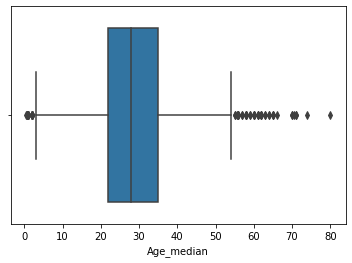

In [55]:
sns.boxplot("Age_median", data =df)

## 5.Arbitrary Value Imputation

consists of replacing the Nan values with an arbitrary value

#### Arbitrary Value
must not be present more frequently
Can be  the last oulier on right side of the boxplot of the first outlier on the left side of the boxplot

In [57]:
def impute_arb(df,variable):
    df[variable + "_arbitrary"] = df.variable.fillna(100) 